<a href="https://colab.research.google.com/github/GislaineGomes/deco_morse/blob/main/A%C3%A7%C3%B5es_MasterCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
start_date = '2019-01-01'
end_date = '2024-11-22'

ativo = 'MSCD34.SA'
# ativos = ['ABEV3.SA','ITSA4.SA']
# dados1 = yf.download(ativo, start='2023-01-01', end='2024-01-01')
dados1 = yf.download(ativo, period='ytd')

# Selecionar as colunas desejadas
# Resetando o índice para colocar a data como coluna
# Adicionar o ticker como uma nova coluna
# Renomear as colunas para algo mais legível
# Exibir o DataFrame
dados = dados1[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]
dados.reset_index(inplace=True)
dados['Ticker'] = ativo
dados.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ativo']
dados.tail()


[*********************100%***********************]  1 of 1 completed


,Date,Adj Close,Close,High,Low,Open,Volume,Ativo
223,2024-11-18 00:00:00+00:00,99.620003,99.620003,99.620003,96.099998,97.639999,14971,MSCD34.SA
224,2024-11-19 00:00:00+00:00,96.599998,96.599998,99.489998,96.230003,99.489998,6803,MSCD34.SA
225,2024-11-21 00:00:00+00:00,96.500000,96.500000,97.300003,96.279999,96.510002,3860,MSCD34.SA
226,2024-11-22 00:00:00+00:00,97.260002,97.260002,97.800003,96.519997,96.959999,6472,MSCD34.SA
227,2024-11-25 00:00:00+00:00,98.300003,98.300003,0.000000,0.000000,0.000000,0,MSCD34.SA


In [4]:
# Calculando as médias móveis
dados['MM21'] = dados['Close'].rolling(window=21).mean()
dados['MM50'] = dados['Close'].rolling(window=50).mean()
dados['MM100'] = dados['Close'].rolling(window=100).mean()
dados['MM200'] = dados['Close'].rolling(window=200).mean()

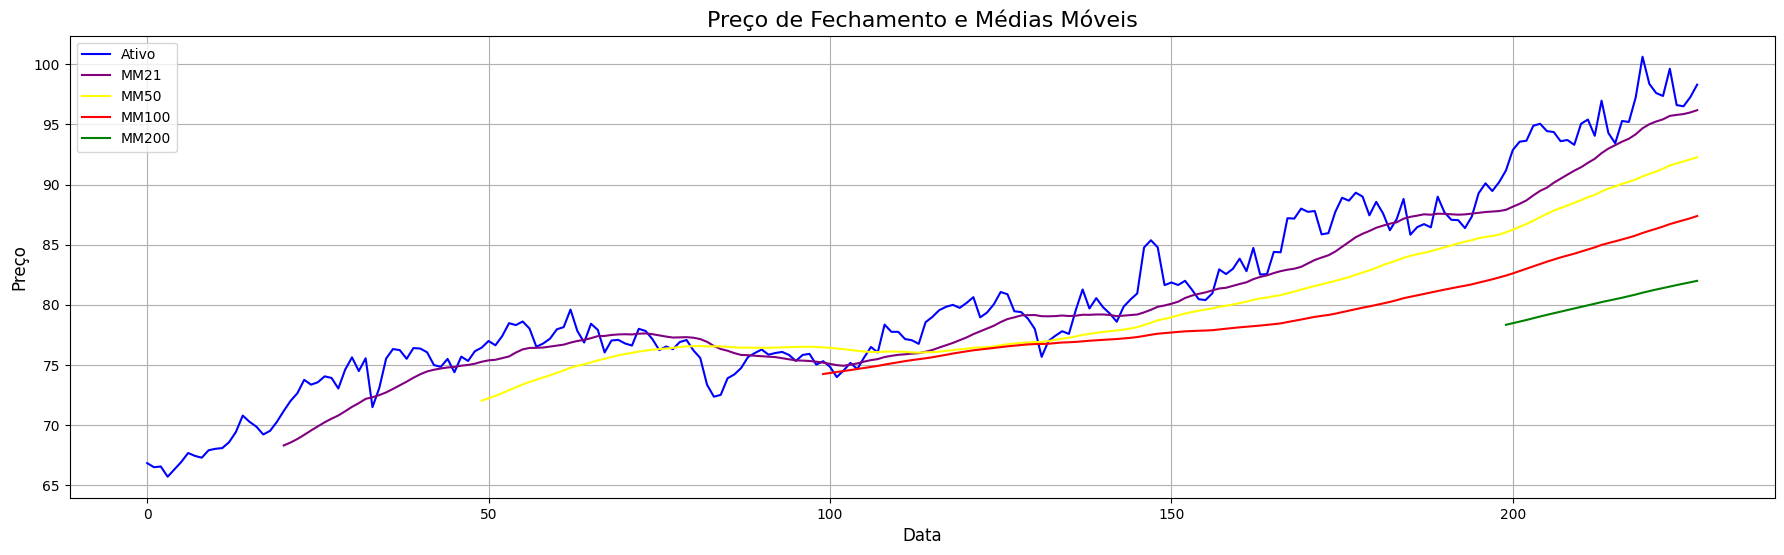

In [5]:
plt.figure(figsize=(22,6))
plt.plot(dados['Close'], label="Ativo", color='blue')
plt.plot(dados['MM21'], label='MM21', color='purple')
plt.plot(dados['MM50'], label='MM50', color='yellow')
plt.plot(dados['MM100'], label='MM100', color='red')
plt.plot(dados['MM200'], label='MM200', color='green')

# Título e rótulos
plt.title('Preço de Fechamento e Médias Móveis', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço', fontsize=12)

# Adicionando a legenda,grade para facilitar a leitura
plt.legend()
plt.grid(True)
plt.show()

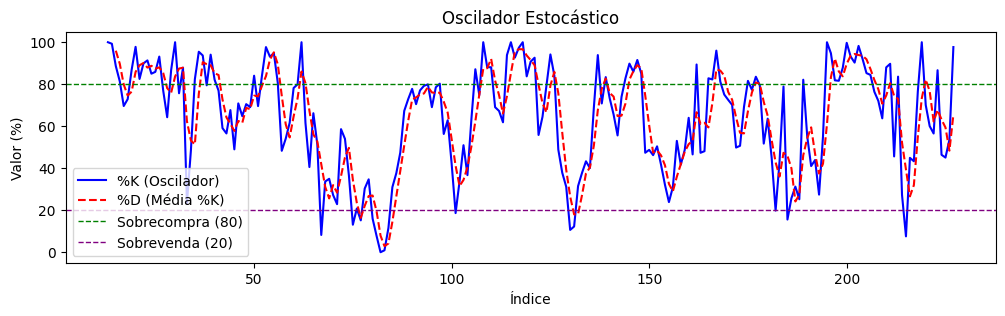

In [6]:
# Período para cálculo
periodo_estocastico = 14

# Calcular %K
dados['Low_14'] = dados['Low'].rolling(window=periodo_estocastico).min()
dados['High_14'] = dados['High'].rolling(window=periodo_estocastico).max()
dados['%K'] = (dados['Close'] - dados['Low_14']) / (dados['High_14'] - dados['Low_14']) * 100

# Calcular %D (Média Móvel de %K)
dados['%D'] = dados['%K'].rolling(window=3).mean()

# Plotar Oscilador Estocástico
plt.figure(figsize=(12, 3))
plt.plot(dados['%K'], label='%K (Oscilador)', color='blue')
plt.plot(dados['%D'], label='%D (Média %K)', color='red', linestyle='--')
plt.axhline(80, color='green', linestyle='--', linewidth=1, label='Sobrecompra (80)')
plt.axhline(20, color='purple', linestyle='--', linewidth=1, label='Sobrevenda (20)')
plt.xlabel('Índice')
plt.ylabel('Valor (%)')
plt.legend()
plt.title('Oscilador Estocástico')
plt.show()

1. Volume: ajuda a confirmar tendências.
2. Accumulation/Distribution Line: mede o fluxo de dinheiro.
3. On Balance Volume (OBV): identifica mudanças no volume.

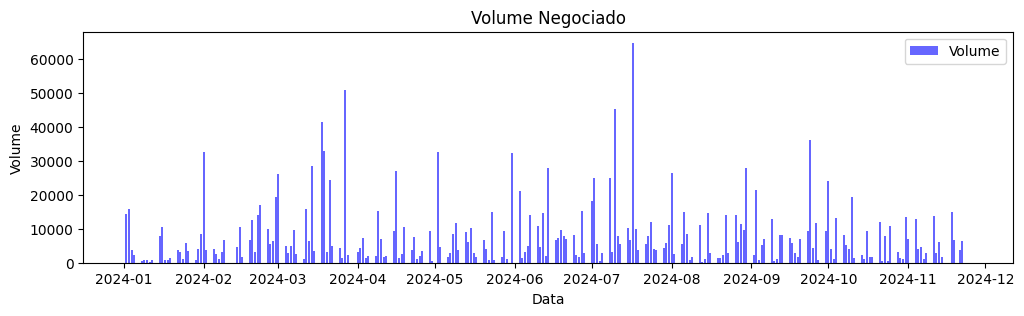

In [7]:
# Plotar Volume
plt.figure(figsize=(12, 3))
# plt.bar(dados.index, dados['Volume'], label='Volume', color='blue', alpha=0.6)
plt.bar(dados['Date'], dados['Volume'], label='Volume', color='blue', alpha=0.6)
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.title('Volume Negociado')
plt.show()

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Mastercard_stock_history.csv')
df2 = pd.read_csv('/content/Mastercard_stock_info.csv')
df3 = pd.read_csv('/content/BD-Completo-_1_.csv')
df.head()



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = df['Volume']
y = df.drop('Volume', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)

X_treino:
 0      395343000
1      103044000
2       49898000
3       30002000
4       62344000
         ...    
395     44661000
396     41105000
397     50920000
398     10526000
399     12477000
Name: Volume, Length: 400, dtype: int64
X_teste:
 400     20166000
401      9901000
402     13115000
403     20156000
404     28994000
          ...   
3867     4724100
3868     3712000
3869     3209200
3870     2336700
3871     2766800
Name: Volume, Length: 3472, dtype: int64
y_treino:
            Date       Open       High        Low      Close  Dividends  \
0    2006-05-25   3.748967   4.283869   3.739664   4.279217        0.0   
1    2006-05-26   4.307126   4.348058   4.103398   4.179680        0.0   
2    2006-05-30   4.183400   4.184330   3.986184   4.093164        0.0   
3    2006-05-31   4.125723   4.219679   4.125723   4.180608        0.0   
4    2006-06-01   4.179678   4.474572   4.176887   4.419686        0.0   
..          ...        ...        ...        ...        ...        ..

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout

In [15]:
model=Sequential()
model.add(LSTM(units=3250,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

(None, 400, 3250)


In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
print(X_treino.shape)
print(X_teste.shape)

(400,)
(3472,)


**Quantidade de vezes que o modelo esta sendo aplicado e com pequenas variaçoes nas açoes

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
X = np.random.randn(100, 600)
y = np.random.randn(100)

In [24]:
model = Sequential()
model.add(Dense(64, input_dim=600, activation='relu'))
model.add(Dense(1))

O Mean Square Error (MSE) é uma métrica comumente usada em estatística e aprendizado de máquina para avaliar a precisão de um modelo preditivo. Ele mede a diferença média ao quadrado entre os valores previstos e os valores reais de um conjunto de dados. O quadrado da diferença é usado para garantir que os erros positivos e negativos sejam levados em conta.

Também vale a pena observar que o MSE é sempre não negativo, pois envolve o quadrado das diferenças. Isso significa que o MSE sempre será maior ou igual a zero.

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
100/100 - 1s - 8ms/step - loss: 2.3786
Epoch 2/100
100/100 - 0s - 2ms/step - loss: 5.2451
Epoch 3/100
100/100 - 0s - 2ms/step - loss: 1.5310
Epoch 4/100
100/100 - 0s - 3ms/step - loss: 0.2465
Epoch 5/100
100/100 - 0s - 3ms/step - loss: 0.1422
Epoch 6/100
100/100 - 0s - 3ms/step - loss: 0.1412
Epoch 7/100
100/100 - 0s - 3ms/step - loss: 0.2221
Epoch 8/100
100/100 - 0s - 3ms/step - loss: 0.3620
Epoch 9/100
100/100 - 0s - 3ms/step - loss: 0.4662
Epoch 10/100
100/100 - 0s - 3ms/step - loss: 0.4262
Epoch 11/100
100/100 - 0s - 3ms/step - loss: 0.3471
Epoch 12/100
100/100 - 0s - 3ms/step - loss: 0.3386
Epoch 13/100
100/100 - 0s - 3ms/step - loss: 0.2332
Epoch 14/100
100/100 - 0s - 3ms/step - loss: 0.1448
Epoch 15/100
100/100 - 0s - 3ms/step - loss: 0.1027
Epoch 16/100
100/100 - 0s - 3ms/step - loss: 0.0905
Epoch 17/100
100/100 - 0s - 2ms/step - loss: 0.0919
Epoch 18/100
100/100 - 0s - 2ms/step - loss: 0.0945
Epoch 19/100
100/100 - 0s - 3ms/step - loss: 0.0965
Epoch 20/100
100/100 

Aplicaçao da arquitetura do arima O modelo ARIMA (AutoRegressive Integrated Moving Average) é uma abordagem clássica para modelar e prever séries temporais. Ele é amplamente usado para séries estacionárias (ou séries que podem ser transformadas em estacionárias) e combina três componentes principais:

AR (AutoRegressive): Parte autorregressiva que usa a relação entre uma observação atual e suas observações passadas. I (Integrated): Parte de integração, que aplica diferenciação nas observações para tornar a série estacionária. MA (Moving Average): Parte de média móvel que utiliza os erros passados (resíduos) para modelar a série

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

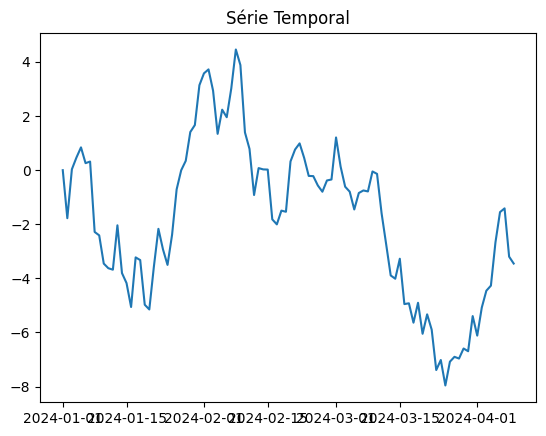

In [29]:
data = pd.Series(np.random.randn(100).cumsum())
data.index = pd.date_range(start="2024-01-01", periods=len(data), freq="D")

# Visualizar a série
plt.plot(data)
plt.title("Série Temporal")
plt.show()

teste de Dickey-Fuller Aumentado (ADF) para verificar se a série é estacionária.

A raiz unitária é um conceito fundamental que indica a não estacionaridade de uma série temporal. Quando uma série temporal é não estacionária, suas propriedades estatísticas, como média e variância, mudam ao longo do tempo, o que pode complicar a modelagem e a previsão

In [30]:
result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.7409131073368262
p-value: 0.4101655623775423


In [31]:
model = ARIMA(data, order=(1, 5, 2))
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 5, 2)   Log Likelihood                -194.553
Date:                Tue, 26 Nov 2024   AIC                            397.105
Time:                        02:15:23   BIC                            407.321
Sample:                    01-01-2024   HQIC                           401.233
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7063      0.086     -8.204      0.000      -0.875      -0.538
ma.L1         -1.9883      2.248     -0.884      0.377      -6.395       2.419
ma.L2          0.9969      2.256      0.442      0.6

Visualizando os dados com uma maior precisão

Previsões futuras: 2024-04-10   -4.580066
2024-04-11   -4.845192
2024-04-12   -5.432246
2024-04-13   -5.460370
2024-04-14   -5.504191
2024-04-15   -5.107269
2024-04-16   -4.538366
2024-04-17   -3.550980
2024-04-18   -2.259495
2024-04-19   -0.520350
Freq: D, Name: predicted_mean, dtype: float64


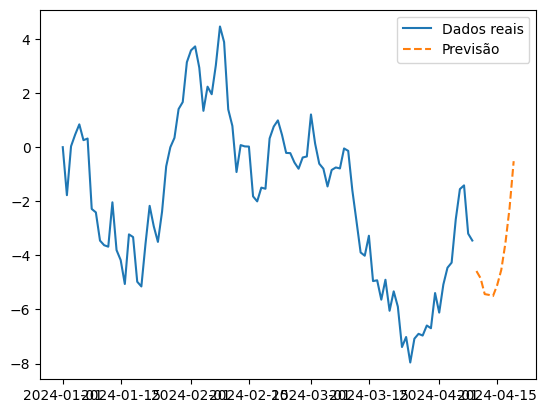

In [32]:
forecast = model_fit.forecast(steps=10)
print("Previsões futuras:", forecast)

# Visualizar previsões
plt.plot(data, label="Dados reais")
plt.plot(forecast, label="Previsão", linestyle="--")
plt.legend()
plt.show()

Prophet é uma biblioteca desenvolvida pelo Facebook para modelar e prever séries temporais. Ele é especialmente útil para prever dados que apresentam padrões sazonais, tendências de longo prazo e outliers, além de lidar bem com lacunas e alterações nos dados.

Principais características do Prophet Fácil de usar, mesmo para quem não tem muita experiência em modelagem de séries temporais. Funciona bem com dados que têm padrões sazonais diários, semanais ou anuais. Permite a inclusão de variáveis externas (regressoras adicionais). Tolerante a valores ausentes ou outliers nos dados

In [33]:
pip install prophet

In [34]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

Criando uma serie temporal , olhando para os ultimos 365 dias a partir da data

In [36]:
# Criar uma série temporal de exemplo
data = pd.DataFrame({
    'ds': pd.date_range(start="2024-01-01", periods=365, freq='D'),  # Datas
    'y': [i + (5 * (i % 30)) + (10 if i % 100 == 0 else 0) for i in range(365)]  # Valores simulados
})

# Visualizar os dados
data.head()

,ds,y
0,2024-01-01,10
1,2024-01-02,6
2,2024-01-03,12
3,2024-01-04,18
4,2024-01-05,24


In [38]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz543fvfh/gyann38h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz543fvfh/sus7xlqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77657', 'data', 'file=/tmp/tmpz543fvfh/gyann38h.json', 'init=/tmp/tmpz543fvfh/sus7xlqg.json', 'output', 'file=/tmp/tmpz543fvfh/prophet_modelrepmly7h/prophet_model-20241126022020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:20:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Criando um data frame com datas Futuras , olhando para os 30 dias para frente com o maior numero de precisão

In [39]:
# Criar um DataFrame com datas futuras
future = model.make_future_dataframe(periods=30)  # Prever 30 dias à frente
forecast = model.predict(future)

# Visualizar as previsões
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()  # yhat = previsão

,ds,yhat,yhat_lower,yhat_upper
0,2024-01-01,67.904175,9.106995,124.462105
1,2024-01-02,69.021103,17.559194,123.653682
2,2024-01-03,69.461816,14.389759,127.873004
3,2024-01-04,69.519659,15.178144,123.423366
4,2024-01-05,69.960436,16.742979,128.768757


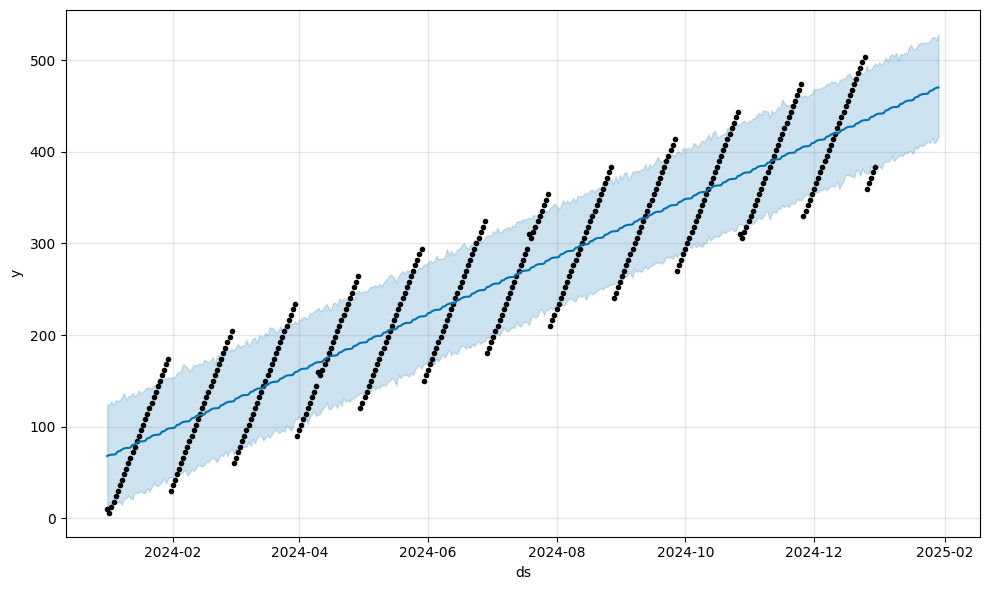

In [40]:
fig = model.plot(forecast)
plt.show()

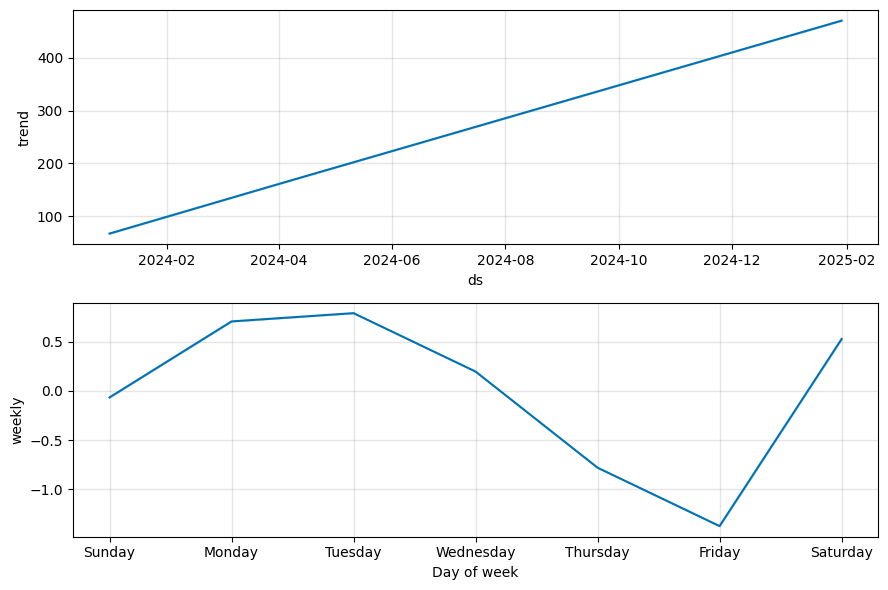

In [41]:
fig_components = model.plot_components(forecast)
plt.show()

Benefícios do Prophet Fácil de configurar e interpretar: Requer menos ajuste em comparação com ARIMA. Automatizado: Detecta tendências e sazonalidades automaticamente. Personalizável: Permite ajustar sazonalidades, feriados e variáveis externas.

In [42]:
from prophet.make_holidays import make_holidays_df

# Criar um conjunto de feriados
holidays = pd.DataFrame({
    'holiday': 'feriado_importante',
    'ds': pd.to_datetime(['2020-02-14', '2023-12-25','2024-01-01']),
    'lower_window': 0,
    'upper_window': 1
})

model = Prophet(holidays=holidays)
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz543fvfh/hnribv5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz543fvfh/tuwf9n4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75427', 'data', 'file=/tmp/tmpz543fvfh/hnribv5e.json', 'init=/tmp/tmpz543fvfh/tuwf9n4e.json', 'output', 'file=/tmp/tmpz543fvfh/prophet_model70v_96wz/prophet_model-20241126022239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
